In [1]:
pwd

'C:\\Users\\Lenovo\\Desktop\\Python\\Codes'

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfx = pd.read_csv('./A1/Linear_X_Train.csv')
dfy = pd.read_csv('./A1/Linear_Y_Train.csv')

x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))

X = (x-x.mean())/x.std()
Y = y

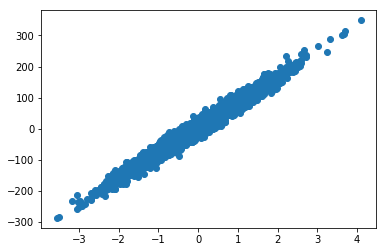

In [7]:
plt.scatter(x,y)

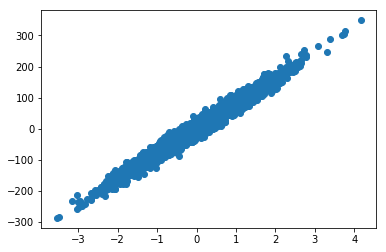

In [22]:
plt.scatter(X,Y)

In [14]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [15]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

In [16]:
def gradient(x,theta,y):
    m = x.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
        
    return grad/m

In [17]:
def gradient_descent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

In [23]:
final_theta , err_list , theta_list = gradient_descent(X,Y)

In [24]:
print(final_theta)

[ 0.68383944 79.90228731]


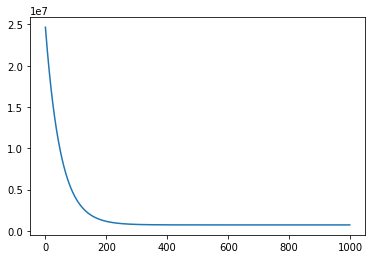

In [25]:
plt.plot(err_list)

In [30]:
test=pd.read_csv('./A1/Linear_X_Train.csv')
test=test.values
test=test.reshape((-1,))
print(test.shape)

(3750,)


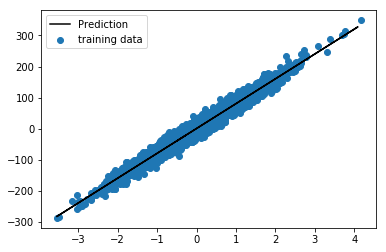

In [33]:
plt.scatter(X,Y,label="training data")
plt.plot(test,hypothesis(test,final_theta),label="Prediction",color="black")
plt.legend()
plt.show()

Using scikit

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from sklearn.linear_model import LinearRegression

In [61]:

dfx = pd.read_csv('./A1/Linear_X_Train.csv')
dfy = pd.read_csv('./A1/Linear_Y_Train.csv')



In [63]:
model = LinearRegression()
x = dfx.values.reshape((-1,1))
y = dfy.values.reshape((-1,1))

In [65]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
pr=pd.read_csv('./A1/Linear_X_Test.csv')
pr=pr.values
pr=pr.reshape((-1,1))

In [68]:
output=model.predict(pr)

In [69]:
bias=model.intercept_
coeff=model.coef_

In [71]:
print(bias)
print(coeff)

[3.72798828]
[[80.54363185]]


In [72]:
model.score(x,y)

0.9709612233822353

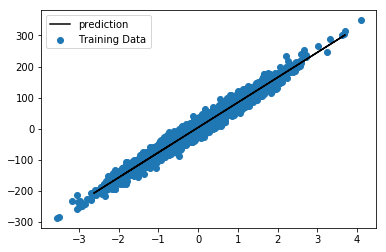

In [74]:
plt.scatter(x,y,label="Training Data")
plt.plot(pr,output,color="black",label="prediction")
plt.legend()
plt.show()